`KDD2024 Workshop / A Hands-On Introduction to Time Series Classification and Regression`

# *Convolutional Methods for Time Series Classification*

## Outline

* [Load Example Data](#Load-Example-Data)
<br><br>
* [Rocket](#Rocket)
* [MiniRocket](#MiniRocket)
    * *Parameter Tuning: **Num. Features***
* [MultiRocket](#MultiRocket)
* [Hydra](#Hydra)
    * *Parameter Tuning: **Num. Groups (`g`), Num. Kernels Per Group (`k`)***
* [MultiRocket+Hydra](#MultiRocket+Hydra)

<br><br><br>
# Load Example Data

In [1]:
from aeon.datasets import load_osuleaf

X_tr, Y_tr = load_osuleaf(split = "train")
X_te, Y_te = load_osuleaf(split = "test")

<br><br><br>
# Rocket
## `RocketClassifier()`

In [2]:
from aeon.classification.convolution_based import RocketClassifier

In [3]:
classifier = RocketClassifier(rocket_transform = "rocket", random_state = 0, n_jobs = -1)

classifier.fit(X_tr, Y_tr)

classifier.score(X_te, Y_te)

0.9421487603305785

<br><br><br>
# MiniRocket
## `RocketClassifier(rocket_transform = "minirocket")`

In [4]:
# from aeon.classification.convolution_based import RocketClassifier

In [5]:
classifier = RocketClassifier(rocket_transform = "minirocket", random_state = 0, n_jobs = -1)

classifier.fit(X_tr, Y_tr)

classifier.score(X_te, Y_te)

0.9586776859504132

<br><!---->
## Parameter Tuning: **Num. Features**
## `GridSearchCV()`

Grid search for the number of features (`num_kernels`) $\in \{100, 1{,}000, 10{,}000\}$ using `GridSearchCV()` (sklearn).

*[allow 5-10s]*

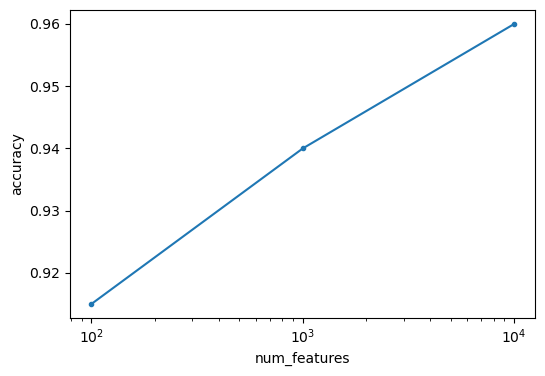

In [6]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as pl

# ==============================================================================
# == fit =======================================================================
# ==============================================================================

param_grid = \
{
    "num_kernels" : [100, 1_000, 10_000],
}

gs = GridSearchCV(
    RocketClassifier(rocket_transform = "minirocket", random_state = 0, n_jobs = 1),
    param_grid,
    n_jobs = -1,
)

gs.fit(X_tr, Y_tr)

# ==============================================================================
# == plot results ==============================================================
# ==============================================================================

f, a = pl.subplots(1, 1, figsize = (6, 4))

a.plot(gs.param_grid["num_kernels"], gs.cv_results_["mean_test_score"], ".-")
a.set_xscale("log", base = 10)

a.set(
    ylabel = "accuracy",
    xlabel = "num_features",
)

pl.show()

Fit/score with best configuration.

In [7]:
gs.score(X_te, Y_te)

0.9586776859504132

<br><br><br>
# MultiRocket
## `RocketClassifier(rocket_transform = "multirocket")`

In [8]:
# from aeon.classification.convolution_based import RocketClassifier

In [9]:
classifier = RocketClassifier(rocket_transform = "multirocket", random_state = 0, n_jobs = -1)

classifier.fit(X_tr, Y_tr)

classifier.score(X_te, Y_te)

0.9628099173553719

<br><br><br>
# Hydra
## `HydraClassifier()`

In [10]:
from aeon.classification.convolution_based import HydraClassifier

In [11]:
classifier = HydraClassifier(n_jobs = -1, random_state = 0)

classifier.fit(X_tr, Y_tr)

classifier.score(X_te, Y_te)

0.987603305785124

<br><!---->
## Parameter Tuning: **Num. Groups (`g`), Num. Kernels Per Group (`k`)**
## `RandomizedSearchCV()`

Random search over $k \in \{2, 4, 8, 16, 32\}$ and $g \in \{1, 2, 4, 8, 16, 32, 64, 128\}$ using `RandomizedSearchCV()` (sklearn).

*[allow 15-20s]*

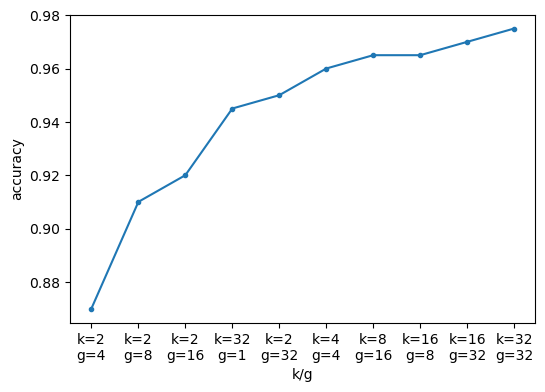

In [12]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as pl

# ==============================================================================
# == fit =======================================================================
# ==============================================================================

param_grid = \
{
    "n_kernels" : [2, 4, 8, 16, 32],
    "n_groups"  : [1, 2, 4, 8, 16, 32, 64, 128],
}

rs = RandomizedSearchCV(
    HydraClassifier(random_state = 0, n_jobs = 1),
    param_grid,
    random_state = 0,
    n_jobs = -1,
)

rs.fit(X_tr, Y_tr)

# ==============================================================================
# == plot results ==============================================================
# ==============================================================================

_scores = rs.cv_results_["mean_test_score"]
_params = np.array([f"k={_[0]}\ng={_[1]}" for _ in [tuple(_.values()) for _ in rs.cv_results_["params"]]])
_order = _scores.argsort()

f, a = pl.subplots(1, 1, figsize = (6, 4))

a.plot(_params[_order], _scores[_order], ".-")

a.set(
    xlabel = "k/g",
    ylabel = "accuracy",
)

pl.show()

Fit/score with best configuration.

In [13]:
rs.score(X_te, Y_te)

0.9917355371900827

<br><br><br>
# MultiRocket+Hydra
## `MultiRocketHydraClassifier()`

In [14]:
from aeon.classification.convolution_based import MultiRocketHydraClassifier

In [15]:
classifier = MultiRocketHydraClassifier(random_state = 0, n_jobs = -1)

classifier.fit(X_tr, Y_tr)

classifier.score(X_te, Y_te)

0.9628099173553719

`[END]`